<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/fun%C3%A7%C3%A3o_OMP_CoSaMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import scipy.linalg
import scipy.signal
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

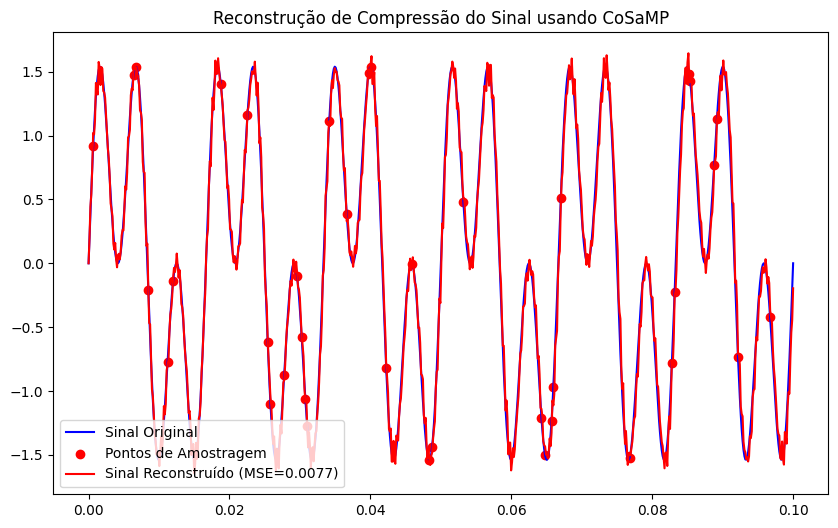

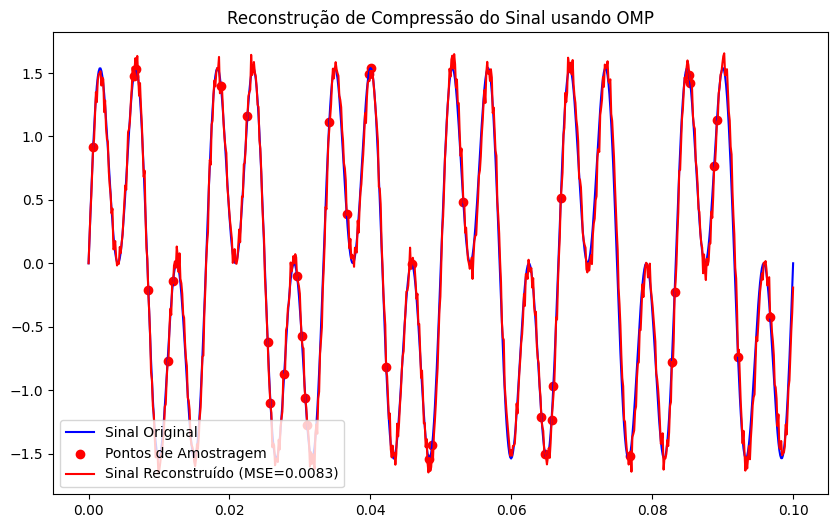

In [35]:
def cosamp(Phi, u, s, tol=1e-10, max_iter=10):
  max_iter-=1
  num_precision = 1e-12
  a = np.zeros(Phi.shape[1])
  v=u
  iter=0
  halt=False
  while not halt:
    iter+=1
    y = np.abs(np.dot(np.transpose(Phi), v))
    Omega = [i for( i, val) in enumerate(y) if val > np.sort(y)[::-1][2 * s] and val > num_precision]
    T = np.union1d(Omega, a.nonzero()[0])
    b = np.dot(np.linalg.pinv(Phi[:,T]), u)
    igood = (np.abs(b) > np.sort(np.abs(b))[::-1][s]) & (np.abs(b) > num_precision)
    T = T[igood]
    a[T] = b[igood]
    v = u - np.dot(Phi[:, T], b[igood])
    halt = np.linalg.norm(v)/np.linalg.norm(u) < tol or iter > max_iter

  return a



def omp(Phi, u, s):
    omp_model = OrthogonalMatchingPursuit(n_nonzero_coefs=s)
    omp_model.fit(Phi, u)
    return omp_model.coef_

def calculate_mse(original, reconstructed):
  return np.mean((original - reconstructed)**2)


n = 768
t = np.linspace(0.0, 0.1, num = n)
f1 = 60
f2 = 180

x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
p = 38
amostras_aleatorias = np.round((n-1)*np.random.rand(p)).astype(int)
y = x[amostras_aleatorias]

Phi = np.fft.fft(np.eye(n, n))
CPhi = np.imag(Phi[amostras_aleatorias, :])
s_reconstruido_cosamp = cosamp(CPhi, y, 10)
x_rec_cosamp = np.imag(np.fft.fft(s_reconstruido_cosamp))
mse_cosamp = calculate_mse(x, x_rec_cosamp)
plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b', label='Sinal Original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec_cosamp, 'r', label=f'Sinal Reconstruído (MSE={mse_cosamp:.4f})')
#plt.xlim(0.4, 0.5)
plt.title('Reconstrução de Compressão do Sinal usando CoSaMP')
plt.legend()
plt.show()


s_reconstruido = omp(CPhi, y, 10)  # obter o vetor esparso através do algoritmo OMP
#x_rec = scipy.fftpack.idct(s_reconstruido, axis=0, norm='ortho')  # Sinal reconstruído
x_rec = np.imag(np.fft.fft(s_reconstruido))
# Calcular o MSE
mse_omp = calculate_mse(x, x_rec)

# Visualizar o sinal original com pontos de amostragem aleatória e erro
plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b', label='Sinal Original')
plt.scatter(t[amostras_aleatorias], x[amostras_aleatorias], color='red', label='Pontos de Amostragem')
plt.plot(t, x_rec, 'r', label=f'Sinal Reconstruído (MSE={mse_omp:.4f})')
#plt.xlim(0.4, 0.5)
plt.title('Reconstrução de Compressão do Sinal usando OMP')
plt.legend()
plt.show()

In [18]:
import random

In [19]:
numero_secreto = random.randint(1,100)
tentativas_restantes=5
while tentativas_restantes > 0:
  tentativa = int(input("Digite um número entre 1 e 100:"))
  if tentativa == numero_secreto:
    print("Você acertou!")
    break
  else:
    print("Tentativa incorreta, tente novamente.")
    tentativas_restantes-=1
    print(f"Tentativas restantes :{tentativas_restantes}")

  if tentativas_restantes==0:
    print(f"Você atingiu o número máximo de tentativas. O número secreto era:{numero_secreto}")





KeyboardInterrupt: Interrupted by user

In [8]:
Phi = np.random.rand(5,10)
a = np.zeros(Phi.shape[1])
for coluna in range(Phi.shape[1]):
    if np.random.rand() > 0.5:
      a[coluna] = np.random.uniform(0.1, 1.0)

print("Matriz Phi:")
print(Phi)
print("\nVetor a (Coeficientes Esparso):")
print(a)




Matriz Phi:
[[0.90601007 0.72985552 0.74726044 0.88785629 0.77098318 0.33431022
  0.61375483 0.31838982 0.52111361 0.41832982]
 [0.36173744 0.57164841 0.69045072 0.93050997 0.31024546 0.10406362
  0.79350161 0.19068996 0.65500414 0.5952432 ]
 [0.81582668 0.4450646  0.37969833 0.9533883  0.5933915  0.56915164
  0.09338487 0.05689389 0.66595671 0.718788  ]
 [0.51853326 0.35942294 0.29646608 0.12055277 0.69507259 0.26717057
  0.60578343 0.76611112 0.71769889 0.81709802]
 [0.8510094  0.04941206 0.19154746 0.59903664 0.83364078 0.95576092
  0.17226161 0.90761759 0.20919853 0.79881874]]

Vetor a (Coeficientes Esparso):
[0.44253416 0.54367044 0.         0.         0.         0.79050445
 0.8912278  0.         0.33560534 0.        ]


In [9]:
nomes = ["Alice","Bob", "Carlos"]
for indice, nome in enumerate(nomes):
  print(f"ìndice: {indice}, Nome:{nome}")

ìndice: 0, Nome:Alice
ìndice: 1, Nome:Bob
ìndice: 2, Nome:Carlos


In [10]:
numeros = [4, 2, 8, 1, 6]

numeros.sort()
print("Ordenado em ordem decrescente:", numeros)

Ordenado em ordem decrescente: [1, 2, 4, 6, 8]


In [11]:
numeros.sort(reverse=True)
print(numeros)

[8, 6, 4, 2, 1]
